In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../src/generic')
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [3]:
from results.process_results import ResultProcessor

In [4]:
main_result_dir = "/data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf"

## Training for Fixed \# of Epochs (3)

### Global Model

In [24]:
# look at training progress
base_result_dir = os.path.join(main_result_dir, "from_embeds", "train_all_my_user_split_from_my_user_split_clf_embeddings")
levels = ["seed"]
global_results = ResultProcessor(base_result_dir, levels, verbose=True)

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/train_all_my_user_split_from_my_user_split_clf_embeddings: Found results for 3 seeds


<AxesSubplot:xlabel='step', ylabel='loss'>

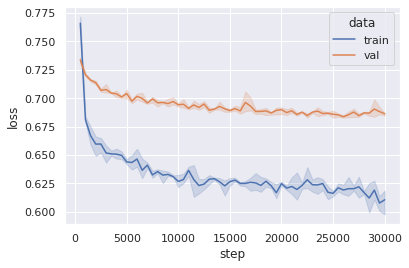

In [18]:
# training loss seems to still be going down but validation loss seems to have plateaued
sns.lineplot(data=global_results.train_hist_df, x="step", y="loss", hue="data")

In [26]:
global_results.results_df[["test_loss", "test_accuracy"]].agg(["mean", "std"])

,test_loss,test_accuracy
mean,0.701973,0.699453
std,0.010909,0.003749


### Person-Specific Model

In [5]:
base_result_dir = os.path.join(main_result_dir, "from_embeds", "person_specific_my_split_n_500_convergence_test")
levels = ["user", "seed"]
ps_results = ResultProcessor(base_result_dir, levels, verbose=True)

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_convergence_test: Found results for 1 users
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_convergence_test/AZZV9PDNMCOZW: Found results for 3 seeds


In [8]:
ps_results.results_df[["test_accuracy", "test_loss"]].agg(["mean", "std"])

,test_accuracy,test_loss
mean,0.400000,1.542039
std,0.176383,0.029954


<AxesSubplot:xlabel='step', ylabel='loss'>

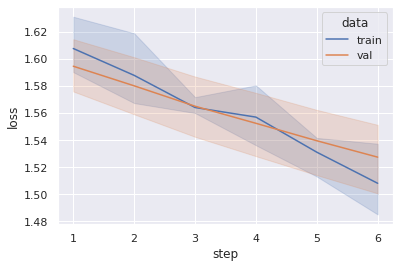

In [13]:
# note this results is for single user: AZZV9PDNMCOZW (didn't rerun to report loss at each step for all users)
sns.lineplot(data=ps_results.train_hist_df, x="step", y="loss", hue="data")

## Stopping Based on Convergence Criteria

### Global Model

In [27]:
# look at training progress
base_result_dir = os.path.join(main_result_dir, "from_embeds", "train_global_early_stopping")
levels = ["seed"]
global_results = ResultProcessor(base_result_dir, levels, verbose=True)

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/train_global_early_stopping: Found results for 3 seeds


<AxesSubplot:xlabel='step', ylabel='loss'>

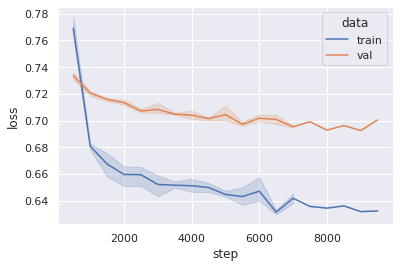

In [20]:
sns.lineplot(data=global_results.train_hist_df, x="step", y="loss", hue="data")

In [21]:
global_results.train_hist_df

,step,data,loss,seed
0,500,train,0.762500,42
1,1000,train,0.682700,42
2,1500,train,0.657900,42
3,2000,train,0.665400,42
4,2500,train,0.665300,42
...,...,...,...,...
19,4000,val,0.703514,44
20,4500,val,0.700051,44
21,5000,val,0.701996,44
22,5500,val,0.699159,44


In [28]:
global_results.results_df[["test_loss", "test_accuracy"]].agg(["mean", "std"])

,test_loss,test_accuracy
mean,0.706844,0.696913
std,0.003550,0.001661


Load per-person eval results

In [41]:
base_result_dir = os.path.join(main_result_dir, "from_embeds", "eval_global_model_early_stopping_across_users")
levels = ["train_seed", "eval_seed"]
global_results = ResultProcessor(base_result_dir, levels, verbose=True)

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/eval_global_model_early_stopping_across_users: Found results for 3 train_seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/eval_global_model_early_stopping_across_users/43: Found results for 1 eval_seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/eval_global_model_early_stopping_across_users/44: Found results for 1 eval_seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/eval_global_model_early_stopping_across_users/42: Found results for 1 eval_seeds


In [46]:
global_results.results_df["train_seed"]

0    43
0    44
0    42
Name: train_seed, dtype: object

In [47]:
# collect results by user
all_results = []
for col in global_results.results_df.columns:
    results = global_results.results_df[col].values
    if col[0] == 'A':
        for val, seed in zip(results, [43, 44, 42]):
            result_dict = {}
            result_dict["user"] = col.split("_")[0]
            result_dict["result"] = "_".join(col.split("_")[1:])
            result_dict["val"] = val
            result_dict["seed"] = seed
            all_results.append(result_dict)

In [49]:
global_df = pd.DataFrame(all_results)
global_df

,user,result,val,seed
0,A101S5PLO0VRHQ,0_accuracy,0.000000,43
1,A101S5PLO0VRHQ,0_accuracy,0.000000,44
2,A101S5PLO0VRHQ,0_accuracy,0.000000,42
3,A101S5PLO0VRHQ,1_accuracy,0.272727,43
4,A101S5PLO0VRHQ,1_accuracy,0.272727,44
...,...,...,...,...
14053,A39IY0JU5JI69G,0_accuracy,NaN,44
14054,A39IY0JU5JI69G,0_accuracy,NaN,42
14055,A3DFMKBGQT9QIH,1_accuracy,NaN,43
14056,A3DFMKBGQT9QIH,1_accuracy,NaN,44


In [50]:
acc_df = global_df[global_df["result"] == "accuracy"]
loss_df = global_df[global_df["result"] == "loss"]

In [52]:
acc_df["val"].agg(["mean", "std"])

mean    0.689322
std     0.184875
Name: val, dtype: float64

In [54]:
acc_df["val"].quantile(q=[.2, .4, .6, .8, 1])

0.2    0.533333
0.4    0.656786
0.6    0.733333
0.8    0.866667
1.0    1.000000
Name: val, dtype: float64

In [53]:
loss_df["val"].agg(["mean", "std"])

mean    0.722369
std     0.365678
Name: val, dtype: float64

In [55]:
loss_df["val"].quantile(q=[.2, .4, .6, .8, 1])

0.2    0.412401
0.4    0.594716
0.6    0.774314
0.8    0.996062
1.0    2.151609
Name: val, dtype: float64

### Person-Specific Models

In [29]:
base_result_dir = os.path.join(main_result_dir, "from_embeds", "person_specific_my_split_n_500_early_stopping")
levels = ["user", "seed"]
ps_results = ResultProcessor(base_result_dir, levels, verbose=True)

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping: Found results for 500 users
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2VV2MISGXFY1O: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1XC010CS7NV8Z: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AP4FQR3BIIYEW: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A27HJP68CKWXP5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AKDF3N2SXY3SP: Found results for 3 s

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A13WOT3RSXKRD5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AYVW3O6W8S5S4: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1YFB1OF0XKJOD: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A37SZWL3R0LEQ3: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3QFDDODG2X2HL: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1FYGMRKYQWZRI: Found r

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A6VXZ1EEPRTLV: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2NDDUI5L26D3Q: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3ANKK0ES1RRKJ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3W2VH8BN66IIR: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1XWDEQMZMPCIH: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A16AL32R7ZZVXB: Found r

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2WDC81C1MQUAS: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2RQOO8VYAEZZG: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3DZT870KCFD1: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AJA8J1GZ35AOI: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2MF4TISBBQT5A: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3SMR4HRFJARSC: Found re

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2UM2ABAII4QTT: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1U0RS0JIDAHDM: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1GARI2JT6EAWA: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2YOFCOEKH3KB: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A25HRZR92Z74V5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1NZLRAZJGD99W: Found r

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3HUO6O1NQ5JPA: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AONUCJBC85BL: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1Z7I6TXMXFP3G: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AGARMSTYE4ZYE: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2WVEBYYZXU3LQ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/ASI65UKWLTDJQ: Found resu

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A21Q18JIMSWIFA: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3O5UR6NHR4MRP: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2IH37N7L0QFX3: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3B56DW0T1PWII: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2SQJPUCZNHMZE: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3VA8JYCNMCP23: Found 

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A37VPW84TDLVNA: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2HPAI1FOYRPVM: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2XRZV63X79YSJ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A26KWG162U8VBQ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/ANAYSRE3LX8GZ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1GOGSMOXRTYW8: Found r

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1ACIK34MC3R7W: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/APGJC13RI61U0: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A9XKEV93OF0W5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3IAIWZ3FYGYI7: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2AHXQYWRVSFLX: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3VIOCJZ22JZXT: Found re

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2H44WVZS59KKT: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A14VYB264WN1PM: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2I4SQOSEF7WH5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1FWGW8LGG2J37: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2XHH5DF8628J8: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1AXSZYFRA93RC: Found 

Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1UAO54QQBULXD: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A1LZQPBALDJ0Y5: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A2ZJHEB8K8JZR3: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A3O22PG4MHDI4Y: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/A101S5PLO0VRHQ: Found results for 3 seeds
Base dir /data/ddmg/redditlanguagemodeling/results/amazon_reviews/clf/from_embeds/person_specific_my_split_n_500_early_stopping/AJ84EHI62LNDE: Found r

In [31]:
# examine performance
user_results_ps = ps_results.results_df.groupby(["user"]).agg(["mean", "std"])[["test_loss", "test_accuracy"]]
user_results_ps

test_loss           test_accuracy          
                    mean       std          mean       std
user                                                      
A101S5PLO0VRHQ  1.057531  0.014976      0.571429  0.000000
A10E0V7PGY34UZ  0.240300  0.003728      0.933333  0.000000
A10O7THJ2O20AG  0.649746  0.005187      0.800000  0.000000
A11P853U6FIKAM  1.055255  0.004417      0.385965  0.000000
A12O5K3EQ4MC7Z  0.738925  0.007110      0.705882  0.019608
...                  ...       ...           ...       ...
AYT4FJYVCHYLE   1.220608  0.017522      0.288889  0.076980
AYVW3O6W8S5S4   1.252717  0.033645      0.600000  0.000000
AZD488SA9QMYF   0.239735  0.006056      0.933333  0.000000
AZJ4DFLH9O4FZ   0.560942  0.018114      0.666667  0.000000
AZZV9PDNMCOZW   1.345622  0.026327      0.466667  0.115470

[500 rows x 4 columns]

In [32]:
user_results_ps.mean()

test_loss      mean    0.684446
               std     0.011241
test_accuracy  mean    0.722472
               std     0.011299
dtype: float64

In [33]:
user_results_ps.std()

test_loss      mean    0.370047
               std     0.012054
test_accuracy  mean    0.180346
               std     0.021178
dtype: float64

In [39]:
user_results_ps.quantile(q=[.2, .4, .6, .8, 1])

test_loss           test_accuracy          
         mean       std          mean       std
0.2  0.376093  0.003210      0.555556  0.000000
0.4  0.581101  0.006072      0.682803  0.000000
0.6  0.761795  0.010643      0.798125  0.000000
0.8  0.996006  0.016626      0.873413  0.022553
1.0  2.207498  0.144460      1.000000  0.176383

In [34]:
user_results_ps.loc["AZZV9PDNMCOZW"]

test_loss      mean    1.345622
               std     0.026327
test_accuracy  mean    0.466667
               std     0.115470
Name: AZZV9PDNMCOZW, dtype: float64

<AxesSubplot:xlabel='step', ylabel='loss'>

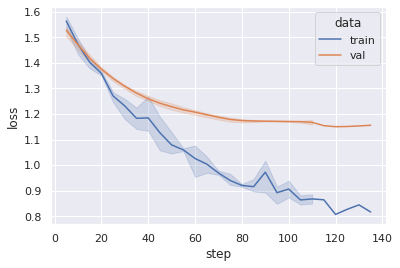

In [37]:
user_hist_df = ps_results.train_hist_df[ps_results.train_hist_df["user"] == "AZZV9PDNMCOZW"]
sns.lineplot(data=user_hist_df, x='step', y='loss', hue='data')

<AxesSubplot:xlabel='step', ylabel='loss'>

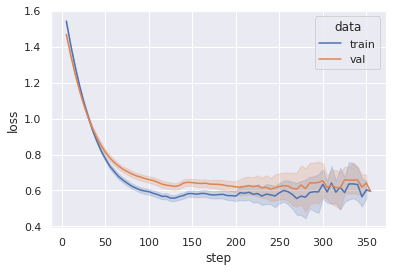

In [38]:
sns.lineplot(data=ps_results.train_hist_df, x='step', y='loss', hue='data')